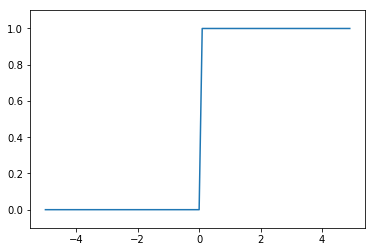

In [1]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)

plt.plot(x, y1)
plt.ylim(-0.1, 1.1)
plt.show()

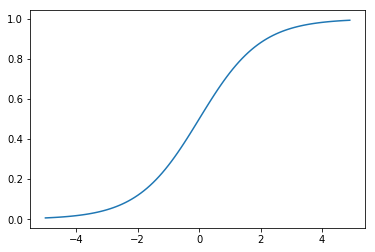

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y2 = sigmoid(x)
plt.plot(x, y2)
plt.show()

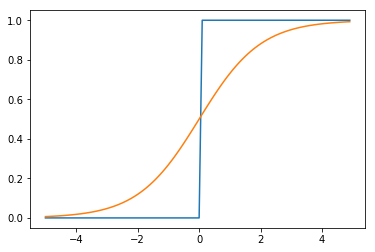

In [3]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

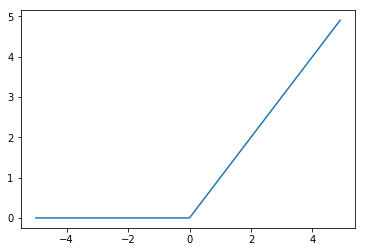

In [4]:
def relu(x):
    return np.maximum(0, x)

y3 = relu(x)
plt.plot(x, y3)
plt.show()

In [5]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network

def forward(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y =  identity_function(a3)
    
    return y

network = init_network()
print(network)
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)


{'W1': array([[ 0.1,  0.3,  0.5],
       [ 0.2,  0.4,  0.6]]), 'b1': array([ 0.1,  0.2,  0.3]), 'W2': array([[ 0.1,  0.4],
       [ 0.2,  0.5],
       [ 0.3,  0.6]]), 'b2': array([ 0.1,  0.2]), 'W3': array([[ 0.1,  0.3],
       [ 0.2,  0.4]]), 'b3': array([ 0.1,  0.2])}
[ 0.31682708  0.69627909]


In [6]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3,2.9,4.0])
print(softmax(a))
print(np.sum(softmax(a)))

[ 0.01821127  0.24519181  0.73659691]
1.0


In [7]:
a = np.array([1010,1000,990])
print(softmax(a))

[ nan  nan  nan]


/Users/mayosuke/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/mayosuke/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


In [8]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
y = softmax(a)
print(y)
print(np.sum(y))

[  9.99954600e-01   4.53978686e-05   2.06106005e-09]
1.0


In [9]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [12]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [13]:
from PIL import Image

In [16]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)
